# semseg/predict

based on [camvid.ipynb](./camvid.ipynb).

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from abcli import fullname
from abcli import string
from abcli.modules import objects
from abcli.plugins import cache
from roofAI import NAME, VERSION
from roofAI.semseg import Profile
from roofAI.semseg.interface import predict
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{NAME}-{VERSION}.{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
roofAI-3.174.1.abcli-7.2428.1-2023-06-aws-batch-a, built on 29 October 2023, 13:28:57


In [2]:
profile = Profile.VALIDATION
dataset_source = "AIRS" # AIRS | CamVid

dataset_object = cache.read(f"roofAI_ingest_{dataset_source}_v1")
model_object = cache.read(f"roofAI_semseg_model_{dataset_source}_full_v1")

prediction_object = objects.unique_object()

📂 2023-10-29-13-28-59-44569


SemSegModel.load(/Users/kamangir/storage/abcli/2023-10-28-13-01-43-87079/model.pth): Profile.VALIDATION
SemSegModel: se_resnext50_32x4d[imagenet]-sigmoid-> roof: 2.00
RoofAIDataset[kind:DatasetKind.CAMVID,source:AIRS](roofAI_ingest_AIRS_2023-10-22-15-05-23-13546): 3 subset(s): 250 X test + 350 X train + 100 X val - 2 class(es): other, roof
SemSegModel.predict(AIRS:/Users/kamangir/storage/abcli/roofAI_ingest_AIRS_2023-10-22-15-05-23-13546/SegNet-Tutorial/CamVid/) -cpu-> /Users/kamangir/storage/abcli/2023-10-29-13-28-59-44569
RoofAIDataset[kind:DatasetKind.CAMVID,source:AIRS](roofAI_ingest_AIRS_2023-10-22-15-05-23-13546): 3 subset(s): 250 X test + 350 X train + 100 X val - 2 class(es): other, roof
RoofAIDataset[kind:DatasetKind.CAMVID,source:AIRS](roofAI_ingest_AIRS_2023-10-22-15-05-23-13546): 3 subset(s): 250 X test + 350 X train + 100 X val - 2 class(es): other, roof


Dataset: 1 class(es): 1
Dataset: 1 item(s).
Dataset: 1 class(es): 1
Dataset: 1 item(s).


6 object(s) found.
-> /Users/kamangir/storage/abcli/2023-10-29-13-28-59-44569/predict-00000.png


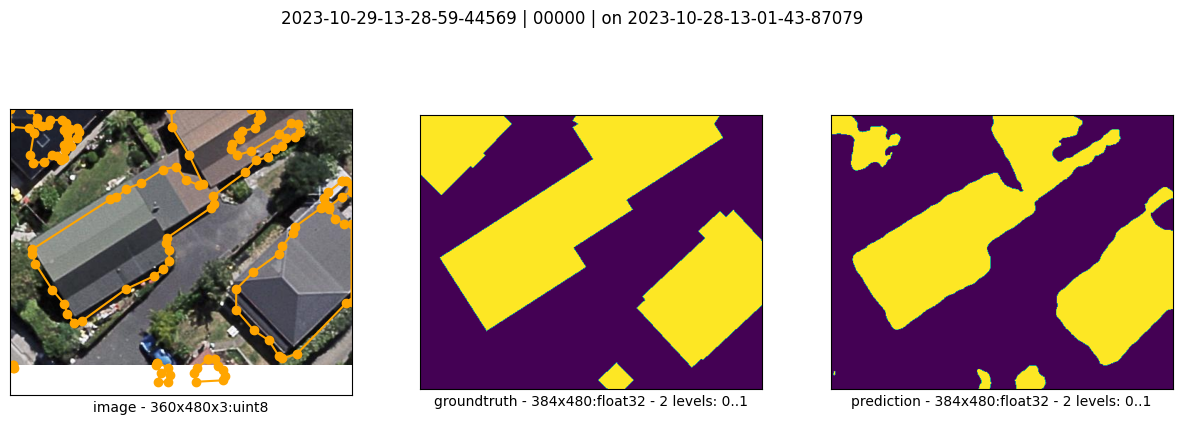

abcli.plugins.gif.generate_animated_gif(1 frames) -> /Users/kamangir/storage/abcli/2023-10-29-13-28-59-44569/predict.gif @ 500.00ms
100%|██████████| 1/1 [00:00<00:00, 627.42it/s]


In [3]:
predict(
    model_path=objects.object_path(model_object),
    dataset_path=objects.object_path(dataset_object),
    prediction_path=objects.object_path(prediction_object),
    device="cpu",
    profile=profile,
    in_notebook=True,
);

In [4]:
# END